In [39]:
import pyreadstat
import pygwalker as pyg

data, meta = pyreadstat.read_xport('06191-0001-Data.xpt')

In [40]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,67.0,1.0,9.0,9.0,9999999999,VVWIIK779274,AK,001,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
1,25.0,9.0,9.0,9.0,9999999999,UCQRBF359793,AK,001,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
2,40.0,9.0,9.0,9.0,9999999999,HTHMWC509187,AK,001,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
3,27.0,9.0,9.0,9.0,9999999999,XJLXLX379698,AK,AST,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
4,25.0,9.0,9.0,9.0,9999999999,SQXRBF358795,AK,999,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736841,59.0,2.0,9.0,9.0,9999999999,100000040643,VT,VSP,,1989.0,...,116.0,9.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
736842,28.0,1.0,9.0,9.0,9999999999,100000011009,VT,999,,1990.0,...,99999.0,4.0,0.0,0.0,15.0,0.0,0.0,30.0,3.0,1990.0
736843,20.0,1.0,9.0,9.0,9999999999,100000041557,VT,014,,1989.0,...,195.0,14.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
736844,43.0,1.0,9.0,9.0,9999999999,100000040435,VT,014,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0


In [9]:
data.to_csv('obts.csv')

# Missing values (substituting)

In [110]:
import pandas as pd
import numpy as np

In [111]:
df = pd.read_csv('https://www.dropbox.com/s/ul503wrxdlw0781/obts.csv?dl=1').drop('Unnamed: 0', axis=1)

/var/folders/p9/d79c5zx13b377v_v34ldc8zh0000gn/T/ipykernel_1711/2380063218.py:1: DtypeWarning: Columns (6,8,22,32,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://www.dropbox.com/s/ul503wrxdlw0781/obts.csv?dl=1').drop('Unnamed: 0', axis=1)


## Fictional NA

In [112]:
# set values in columns 24 through 61 to 'case closed/on hold' where V17 does not equal '8'
df.loc[df['V17'].isin([1, 2, 3, 4, 5, 9]), df.columns[23:]] = 'case closed/on hold'


# set values in columns 34 through 61 to 'case closed/on hold' where V27 equals 4, 5, 7, 8, or 9
df.loc[df['V27'].isin([4, 5, 7, 8, 9]), df.columns[33:]] = 'case closed/on hold'

# set values in columns 54 through 61 to 'not convicted, no sentence' where V53 equals 77
df.loc[df['V53'].isin([77]), df.columns[53:]] = 'not convicted, no sentence'

## Natural NA

In [133]:
replace_dict = {
    'V1': 99,
    'V2': 9,
    'V3': 9,
    'V4': 9,
    'V5': 9999999999,
    'V8': 999,
    'V9': 99,
    'V10': 9999,
    'V11': 99,
    'V12': 99,
    'V13': 99,
    'V15': 9999,
    'V16': [4, 9],
    'V17': 9,
    'V18': 9999,
    'V19': 99,
    'V20': 99,
    'V21': 99999,
    'V22': 9,
    'V23': 9,
    'V24': 9999,
    'V25': 9,
    'V26': 99,
    'V27': 9,
    'V28': 9999,
    'V29': 99,
    'V30': 99,
    'V31': 99999,
    'V32': 9,
    'V33': 9,
    'V34': 9999,
    'V35': 9,
    'V36': 99,
    'V37': 99,
    'V38': 99,
    'V39': 9999,
    'V40': 99,
    'V41': 99,
    'V42': 99999,
    'V43': 9,
    'V44': 9,
    'V45': 9,
    'V46': 9,
    'V47': 9,
    'V48': 9,
    'V49': 9999,
    'V50': 99,
    'V51': 99,
    'V52': 99999,
    'V53': 99,
    'V54': 999,
    'V55': 99,
    'V56': 999,
    'V57': 999,
    'V58': 99,
    'V59': 999,
    'V60': 9    
}


columns_to_replace = list(replace_dict.keys())

df[columns_to_replace] = df[columns_to_replace].replace(replace_dict, value=np.nan)

# Data relabelling 

In [156]:
value_dict = {1: 'male', 2: 'female'}
df['V2'] = df['V2'].replace(value_dict)

value_dict = {1: 'white', 2: 'black', 3: 'american indian or alaskan native', 4: 'asian or pacific islander'}
df['V3'] = df['V3'].replace(value_dict)

value_dict = {1: 'hispanic', 2: 'non-hispanic'}
df['V4'] = df['V4'].replace(value_dict)

value_dict = {1: 'only one arrest charge', 88: 'not disposed by police ', 99: 'condensed record for multiple charges'}
df['V14'] = df['V14'].replace(value_dict)

value_dict = {1: 'felony level', 2: 'misdemeanor level', 3: 'other level'}
df['V16'] = df['V16'].replace(value_dict)

value_dict = {1: 'transfer to other law enforcement agency', 2: 'transfer to other agency', 
              3: 'released', 4: 'other final disposition', 5: 'constructed code (police disposition determined)',
             8: 'not disposed by police'}
df['V17'] = df['V17'].replace(value_dict)

value_dict = {8888: 'not disposed by police'}
df['V18'] = df['V18'].replace(value_dict)

value_dict = {88: 'not disposed by police'}
df['V19'] = df['V19'].replace(value_dict)

value_dict = {88: 'not disposed by police'}
df['V20'] = df['V20'].replace(value_dict)

value_dict = {'A': 'attempt to commit', 'B': 'assault to commit', 'C': 'conspiracy to commit', 
              'F': 'facilitation of commit', 'S': 'solicitation of commit', 'T': 'threaten to commit',
             'U': 'unsupplemented actual offense', 'X': 'aid/abet', 'Y': 'accessory before the fact',
             'Z': 'accessory after the fact'}
df['V22'] = df['V22'].replace(value_dict)

value_dict = {1: 'not released from custody', 2: 'released, own recognizance', 3: 'released, private bail',
             4: 'released, professional bail', 5: 'released to a third party', 6: 'court ordered release', 
             7: 'other release', 8: 'not applicable, not awaiting trial'}
df['V23'] = df['V23'].replace(value_dict)

value_dict = {8888: 'inapplicable, not charged'}
df['V24'] = df['V24'].replace(value_dict)

value_dict = {1: 'felony level', 2: 'misdemeanor level', 3: 'other level', 4: 'level not specified',
             8: 'inapplicable, not charged'}
df['V25'] = df['V25'].replace(value_dict)

value_dict = {88: 'inapplicable, no offense charged or filed'}
df['V26'] = df['V26'].replace(value_dict)

value_dict = {1: 'prosecution, felony charge', 2: 'prosecution, misdemeanor charge', 3: 'prosecution, other charge',
             4: 'prosecution declined, nolle prosequi', 5: 'no true bill', 
              6: 'constructed code, prosecuted, level not specified', 
             7: 'constructed code, not prosecuted, reason not determined', 8: 'not disposed by prosecutor/grand jury'}
df['V27'] = df['V27'].replace(value_dict)


value_dict = {8888: 'not disposed by prosecutor/grand jury'}
df['V28'] = df['V28'].replace(value_dict)

value_dict = {88: 'not disposed by prosecutor/grand jury'}
df['V29'] = df['V29'].replace(value_dict)

value_dict = {88: 'not disposed by prosecutor/grand jury'}
df['V30'] = df['V30'].replace(value_dict)

value_dict = {8: 'not disposed by the prosecutor/grand jury', 'A': 'attempt to commit', 'B': 'assault to commit', 
              'C': 'conspiracy to commit', 'F': 'facilitation of commit', 'S': 'solicitation of commit', 
              'T': 'threaten to commit', 'U': 'unsupplemented actual offense', 'X': 'aid/abet', 
              'Y': 'accessory before the fact', 'Z': 'accessory after the fact'}
df['V32'] = df['V32'].replace(value_dict)

value_dict = {1: 'not released from custody', 2: 'released, own recognizance', 3: 'released, private bail',
             4: 'released, professional bail', 5: 'released to a third party', 6: 'court ordered release', 
             7: 'other release', 8: 'not applicable, not awaiting trial'}
df['V33'] = df['V33'].replace(value_dict)

value_dict = {8888: 'inapplicable, not charged'}
df['V34'] = df['V34'].replace(value_dict)

value_dict = {1: 'felony level', 2: 'misdemeanor level', 3: 'other level', 4: 'level not specified'}
df['V35'] = df['V35'].replace(value_dict)


value_dict = {1: 'convicted', 2: 'probation without verdict', 3: 'not guilty by reason of insanity', 
              4: 'acquitted', 5: 'dismissed', 6: 'civil procedure', 7: 'off calendar', 
             8: 'guilty but mentally ill', 11: 'nolle prosequi', 12: 'other', 
             13: 'constructed code, disposition by court, disposition unknown', 
              14: 'constructed code, disposition by court, sentence imposed'}
df['V37'] = df['V37'].replace(value_dict)

value_dict = {1: 'lower', 2: 'upper', 3: 'other court'}
df['V43'] = df['V43'].replace(value_dict)

value_dict = {1: 'non-jury', 2: 'jury', 3: 'transcript', 4: 'other', 5: 'dismissal'}
df['V44'] = df['V44'].replace(value_dict)

value_dict = {1: 'private', 2: 'assigned councel', 3: 'self', 4: 'public defender', 5: 'other'}
df['V45'] = df['V45'].replace(value_dict)

value_dict = {1: 'not guilty', 2: 'not guilty by reason of insanity', 3: 'guilty', 4: 'nolo contendere', 5: 'other'}
df['V46'] = df['V46'].replace(value_dict)


value_dict = {8: 'not disposed by the court', 'A': 'attempt to commit', 'B': 'assault to commit', 
              'C': 'conspiracy to commit', 'F': 'facilitation of commit', 'S': 'solicitation of commit', 
              'T': 'threaten to commit', 'U': 'unsupplemented actual offense', 'X': 'aid/abet', 
              'Y': 'accessory before the fact', 'Z': 'accessory after the fact'}
df['V47'] = df['V47'].replace(value_dict)

value_dict = {1: 'not released from custody', 2: 'released, own recognizance', 3: 'released, private bail',
             4: 'released, professional bail', 5: 'released to a third party', 6: 'court ordered release', 
             7: 'other release', 8: 'not applicable, not awaiting trial'}
df['V48'] = df['V48'].replace(value_dict)


value_dict = {8888: 'not convicted'}
df['V49'] = df['V49'].replace(value_dict)

value_dict = {88: 'not convicted'}
df['V50'] = df['V50'].replace(value_dict)


value_dict = {1: 'death', 2: 'prison, with or without fine', 3: 'prison and restitution, with or without fine',
             4: 'jail, with or without fine', 5: 'jail and restitution, with or without fine', 
             6: 'probation with prison or jail sentence suspended', 7: 'probation, with or without fine', 
             8: 'probation and restitution, with or without fine', 9: 'fine with prison or jail sentence suspended', 
             10: 'fine only', 11: 'fine and restitution', 12: 'restitution only', 13: 'other', 
             14: 'sentencing deferred', 15: 'entire sentence suspended', 16: 'prison and probation', 
             17: 'jail and probation', 18: 'residential community corrections', 
             19: 'constructed code, incarceration determined', 20: 'constructed code, non-incarceration determined', 
            21: 'constructed code, unknown sentence imposed', 77: 'not convicted, no sentence'}
df['V53'] = df['V53'].replace(value_dict)


value_dict = {555: 'death', 666: 'life', 777: 'indeterminate', 888: 'not sentenced to incarceration'}
df['V54'] = df['V54'].replace(value_dict)

value_dict = {55: 'death', 66: 'life', 77: 'indeterminate', 88: 'not sentenced to incarceration'}
df['V55'] = df['V55'].replace(value_dict)

value_dict = {555: 'death', 666: 'life', 777: 'indeterminate', 888: 'not sentenced to incarceration'}
df['V56'] = df['V56'].replace(value_dict)

value_dict = {555: 'death', 666: 'life', 777: 'indeterminate', 888: 'not sentenced to incarceration'}
df['V57'] = df['V57'].replace(value_dict)

value_dict = {55: 'death', 66: 'life', 77: 'indeterminate', 88: 'not sentenced to incarceration'}
df['V58'] = df['V58'].replace(value_dict)

value_dict = {555: 'death', 666: 'life', 777: 'indeterminate', 888: 'not sentenced to incarceration'}
df['V59'] = df['V59'].replace(value_dict)


value_dict = {1: 'one prison or jail sentence', 2: 'two or more concurrent sentences', 
              3: 'two or more consecutive sentences', 4: 'mixture of concurrent and consecutive sentences',
             8: 'no prison or jail sentence'}
df['V60'] = df['V60'].replace(value_dict)

# New column names

In [158]:
new_column_names = ['age_at_arrest', 'sex', 'race', 'ethnic_origin', 'incident_number', 'encrypted_id_number', 
                    'state', 'arresting_agency_county', 'sub_county_code', 'year_of_arrest', 'month_of_arrest', 
                    'day_of_arrest', 'number_of_arrest_charges', 'sequence_number_of_charges', 
                    'arrest_chg_offense_code', 'level_of_arrest_charge', 'police_disposition', 
                    'year_of_police_disposition', 'month_of_police_disposition', 'day_of_police_disposition',
                    'elapsed_time_police_disp', 'general_offense_code_police', 'pre_trial_status_police', 
                    'charged_offense_code', 'level_of_charged_offense', 'number_of_charged_filed_offenses', 
                    'prosec_grand_jury_disposition', 'year_of_prosec_disp', 'month_of_prosec_disp', 
                    'day_of_prosec_disp', 'elapsed_time_prosec_disp', 'general_offense_code_prosec',
                    'pre_trial_status_prosec', 'court_disp_offense_code', 'level_of_court_disp_offenses', 
                    'number_of_court_disp_offenses', 'court_disposition', 'number_of_conviction_offenses', 
                    'year_of_final_court_disp', 'month_of_final_court_disp', 'day_of_final_court_disp',
                    'elapsed_time_final_court_disp', 'type_of_court_final_disp', 'type_of_trial', 
                    'type_of_counsel_at_disp', 'final_pleading', 'general_offense_code_court', 
                    'pre_trial_status_court', 'year_of_sentencing_date', 'month_of_sentencing_date', 
                    'day_of_sentencing_date', 'elapsed_time_of_sentencing_date', 'sentencing_type', 
                    'years_of_sentencing_min', 'months_of_sentencing_min', 'days_of_sentencing_min', 
                    'years_of_sentencing_max', 'months_of_sentencing_max', 'days_of_sentencing_max', 
                   'multiple_incar_sentence', 'year_disposition_determined']

df.columns = new_column_names

In [159]:
df

,age_at_arrest,sex,race,ethnic_origin,incident_number,encrypted_id_number,state,arresting_agency_county,sub_county_code,year_of_arrest,...,elapsed_time_of_sentencing_date,sentencing_type,years_of_sentencing_min,months_of_sentencing_min,days_of_sentencing_min,years_of_sentencing_max,months_of_sentencing_max,days_of_sentencing_max,multiple_incar_sentence,year_disposition_determined
0,67.0,male,NaN,NaN,NaN,VVWIIK779274,AK,001,NaN,1990.0,...,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold
1,25.0,NaN,NaN,NaN,NaN,UCQRBF359793,AK,001,NaN,1990.0,...,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold
2,40.0,NaN,NaN,NaN,NaN,HTHMWC509187,AK,001,NaN,1990.0,...,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold
3,27.0,NaN,NaN,NaN,NaN,XJLXLX379698,AK,AST,NaN,1990.0,...,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold
4,25.0,NaN,NaN,NaN,NaN,SQXRBF358795,AK,999,NaN,1990.0,...,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736841,59.0,female,NaN,NaN,NaN,100000040643,VT,VSP,NaN,1989.0,...,116.0,fine with prison or jail sentence suspended,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,no prison or jail sentence,1990.0
736842,28.0,male,NaN,NaN,NaN,100000011009,VT,999,NaN,1990.0,...,NaN,"jail, with or without fine",0.0,0.0,15.0,0.0,0.0,30.0,two or more consecutive sentences,1990.0
736843,20.0,male,NaN,NaN,NaN,100000041557,VT,014,NaN,1989.0,...,195.0,sentencing deferred,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,not sentenced to incarceration,no prison or jail sentence,1990.0
736844,43.0,male,NaN,NaN,NaN,100000040435,VT,014,NaN,1990.0,...,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold,case closed/on hold


In [174]:
df.to_csv('obts_recoded.csv')

# NA & counties

In [163]:
# creating true county name and deleting duplicates

df['county_true'] = df['state'].fillna('').astype(str).str.cat(df['arresting_agency_county'].fillna('').astype(str), sep='_')


In [165]:
# replacing empty strings with natural NA (as we created empty strings for concatenation only)

df['county_true'] = df['county_true'].replace('', np.nan)
df['state'] = df['state'].replace('', np.nan)
df['arresting_agency_county'] = df['arresting_agency_county'].replace('', np.nan)

In [169]:
# getting unique values of county_true
unique_categories = df['county_true'].dropna().unique()

# creating a dictionary to store subsets of the data
dt_dict = {}

# looping through unique categories and creating a subset for each one
for category in unique_categories:
    subset_name = f'dt_{category}' 
    dt_dict[subset_name] = df[df['county_true'] == category]

# printing summary of the 'dt_001' subset
print(dt_dict['dt_AK_001'].describe())

       age_at_arrest  incident_number  sub_county_code  year_of_arrest  \
count    1728.000000              0.0              0.0     1737.000000   
mean       29.785301              NaN              NaN     1989.315486   
std        10.064567              NaN              NaN        1.135699   
min        11.000000              NaN              NaN     1984.000000   
25%        22.000000              NaN              NaN     1989.000000   
50%        28.000000              NaN              NaN     1990.000000   
75%        35.000000              NaN              NaN     1990.000000   
max        83.000000              NaN              NaN     1990.000000   

       month_of_arrest  day_of_arrest  number_of_arrest_charges  \
count      1737.000000            0.0               1737.000000   
mean          6.317789            NaN                  1.873921   
std           3.458825            NaN                  1.792745   
min           1.000000            NaN                  1.000000  

### Mean value of NA in each column

In [170]:
# getting unique values of state
unique_categories = df['county_true'].dropna().unique()

# looping through unique categories and creating a dictionary to store the mean percentage of missing values
mean_missing_dict = {}
for category in unique_categories:
    # creating a subset for the category
    subset_name = f'dt_{category}' 
    subset = df[df['county_true'] == category]

    # counting percentage of missing values for each column in the subset
    missing_percentages = subset.isna().mean() * 100

    # calculating the mean percentage of missing values across all columns for the subset
    mean_missing = missing_percentages.mean()

    # adding the mean percentage of missing values to the dictionary
    mean_missing_dict[subset_name] = mean_missing

# printing the mean percentage of missing values for each subset
for subset_name, mean_missing in mean_missing_dict.items():
    print(f'{subset_name}: {mean_missing}')

dt_AK_001: 23.33556186974205
dt_AK_AST: 23.118279569892476
dt_AK_999: 23.61978263383049
dt_AK_DI0: 23.494623655913976
dt_AK_BND: 23.08467741935484
dt_AL_SS3: 35.483870967741936
dt_AL_003: 43.397810853072336
dt_AL_001: 42.70025225910123
dt_AL_002: 40.64948397903497
dt_AL_047: 42.00511811709001
dt_AL_052: 42.6246597556032
dt_AL_022: 39.01985111662534
dt_AL_059: 42.309094222708225
dt_AL_046: 41.80193137456338
dt_AL_014: 40.322580645161295
dt_AL_012: 44.98800319914692
dt_AL_041: 43.24385292127227
dt_AL_029: 41.666666666666664
dt_AL_005: 41.479663394109416
dt_AL_067: 42.41592312971861
dt_AL_064: 44.60892620415379
dt_AL_034: 42.49999999999998
dt_AL_023: 43.82029415399828
dt_AL_042: 44.20909444228529
dt_AL_057: 43.45956054230948
dt_AL_038: 44.10416547298459
dt_AL_039: 40.84188660801565
dt_AL_013: 45.08448540706605
dt_AL_063: 44.46598428453265
dt_AL_004: 41.499564080209225
dt_AL_011: 42.31386960664214
dt_AL_031: 42.27748691099478
dt_AL_027: 42.68219832735961
dt_AL_061: 42.688172043010745
dt_AL

# NA & states

In [172]:
# getting unique values of state
unique_categories = df['state'].dropna().unique()

# creating a dictionary to store subsets of the data
dt_dict = {}

# looping through unique categories and creating a subset for each one
for category in unique_categories:
    subset_name = f'dt_{category}' 
    dt_dict[subset_name] = df[df['state'] == category]

# printing summary of the 'dt_001' subset
print(dt_dict['dt_AK'].describe())

       age_at_arrest  incident_number  sub_county_code  year_of_arrest  \
count    3625.000000              0.0              0.0     3649.000000   
mean       29.912828              NaN              NaN     1989.389696   
std         9.979317              NaN              NaN        1.057276   
min        11.000000              NaN              NaN     1984.000000   
25%        22.000000              NaN              NaN     1989.000000   
50%        28.000000              NaN              NaN     1990.000000   
75%        35.000000              NaN              NaN     1990.000000   
max        83.000000              NaN              NaN     1990.000000   

       month_of_arrest  day_of_arrest  number_of_arrest_charges  \
count      3649.000000            0.0               3649.000000   
mean          6.366950            NaN                  1.877227   
std           3.388806            NaN                  1.771252   
min           1.000000            NaN                  1.000000  

### Mean value of NA in each column

In [173]:
# getting unique values of state
unique_categories = df['state'].dropna().unique()

# looping through unique categories and creating a dictionary to store the mean percentage of missing values
mean_missing_dict = {}
for category in unique_categories:
    # creating a subset for the category
    subset_name = f'dt_{category}' 
    subset = df[df['state'] == category]

    # counting percentage of missing values for each column in the subset
    missing_percentages = subset.isna().mean() * 100

    # calculating the mean percentage of missing values across all columns for the subset
    mean_missing = missing_percentages.mean()

    # adding the mean percentage of missing values to the dictionary
    mean_missing_dict[subset_name] = mean_missing

# printing the mean percentage of missing values for each subset
for subset_name, mean_missing in mean_missing_dict.items():
    print(f'{subset_name}: {mean_missing}')

dt_AK: 23.378035520115997
dt_AL: 42.51167988667225
dt_CA: 39.6817744789726
dt_ID: 36.334739881183715
dt_MN: 26.98709886175637
dt_MO: 21.297296377877764
dt_NB: 34.4291405391428
dt_NJ: 25.423273342398
dt_NY: 35.40781084879225
dt_PA: 22.80321388938584
dt_VA: 35.62388165224525
dt_VT: 27.656663141195132


# Bar charts for police/prosecution/court dispositions variables

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('https://www.dropbox.com/s/20jo1wln01ihb0r/obts_recoded.csv?dl=1')

data_copy = data.copy()
data_copy['police_disposition'] = data_copy['police_disposition'].fillna('NaN')
data_copy['prosec_grand_jury_disposition'] = data_copy['prosec_grand_jury_disposition'].fillna('NaN')
data_copy['court_disposition'] = data_copy['court_disposition'].fillna('NaN')

/var/folders/p9/d79c5zx13b377v_v34ldc8zh0000gn/T/ipykernel_1711/1932625431.py:5: DtypeWarning: Columns (4,6,8,22,23,24,25,26,30,31,32,33,34,36,38,39,40,41,42,47,48,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://www.dropbox.com/s/20jo1wln01ihb0r/obts_recoded.csv?dl=1')


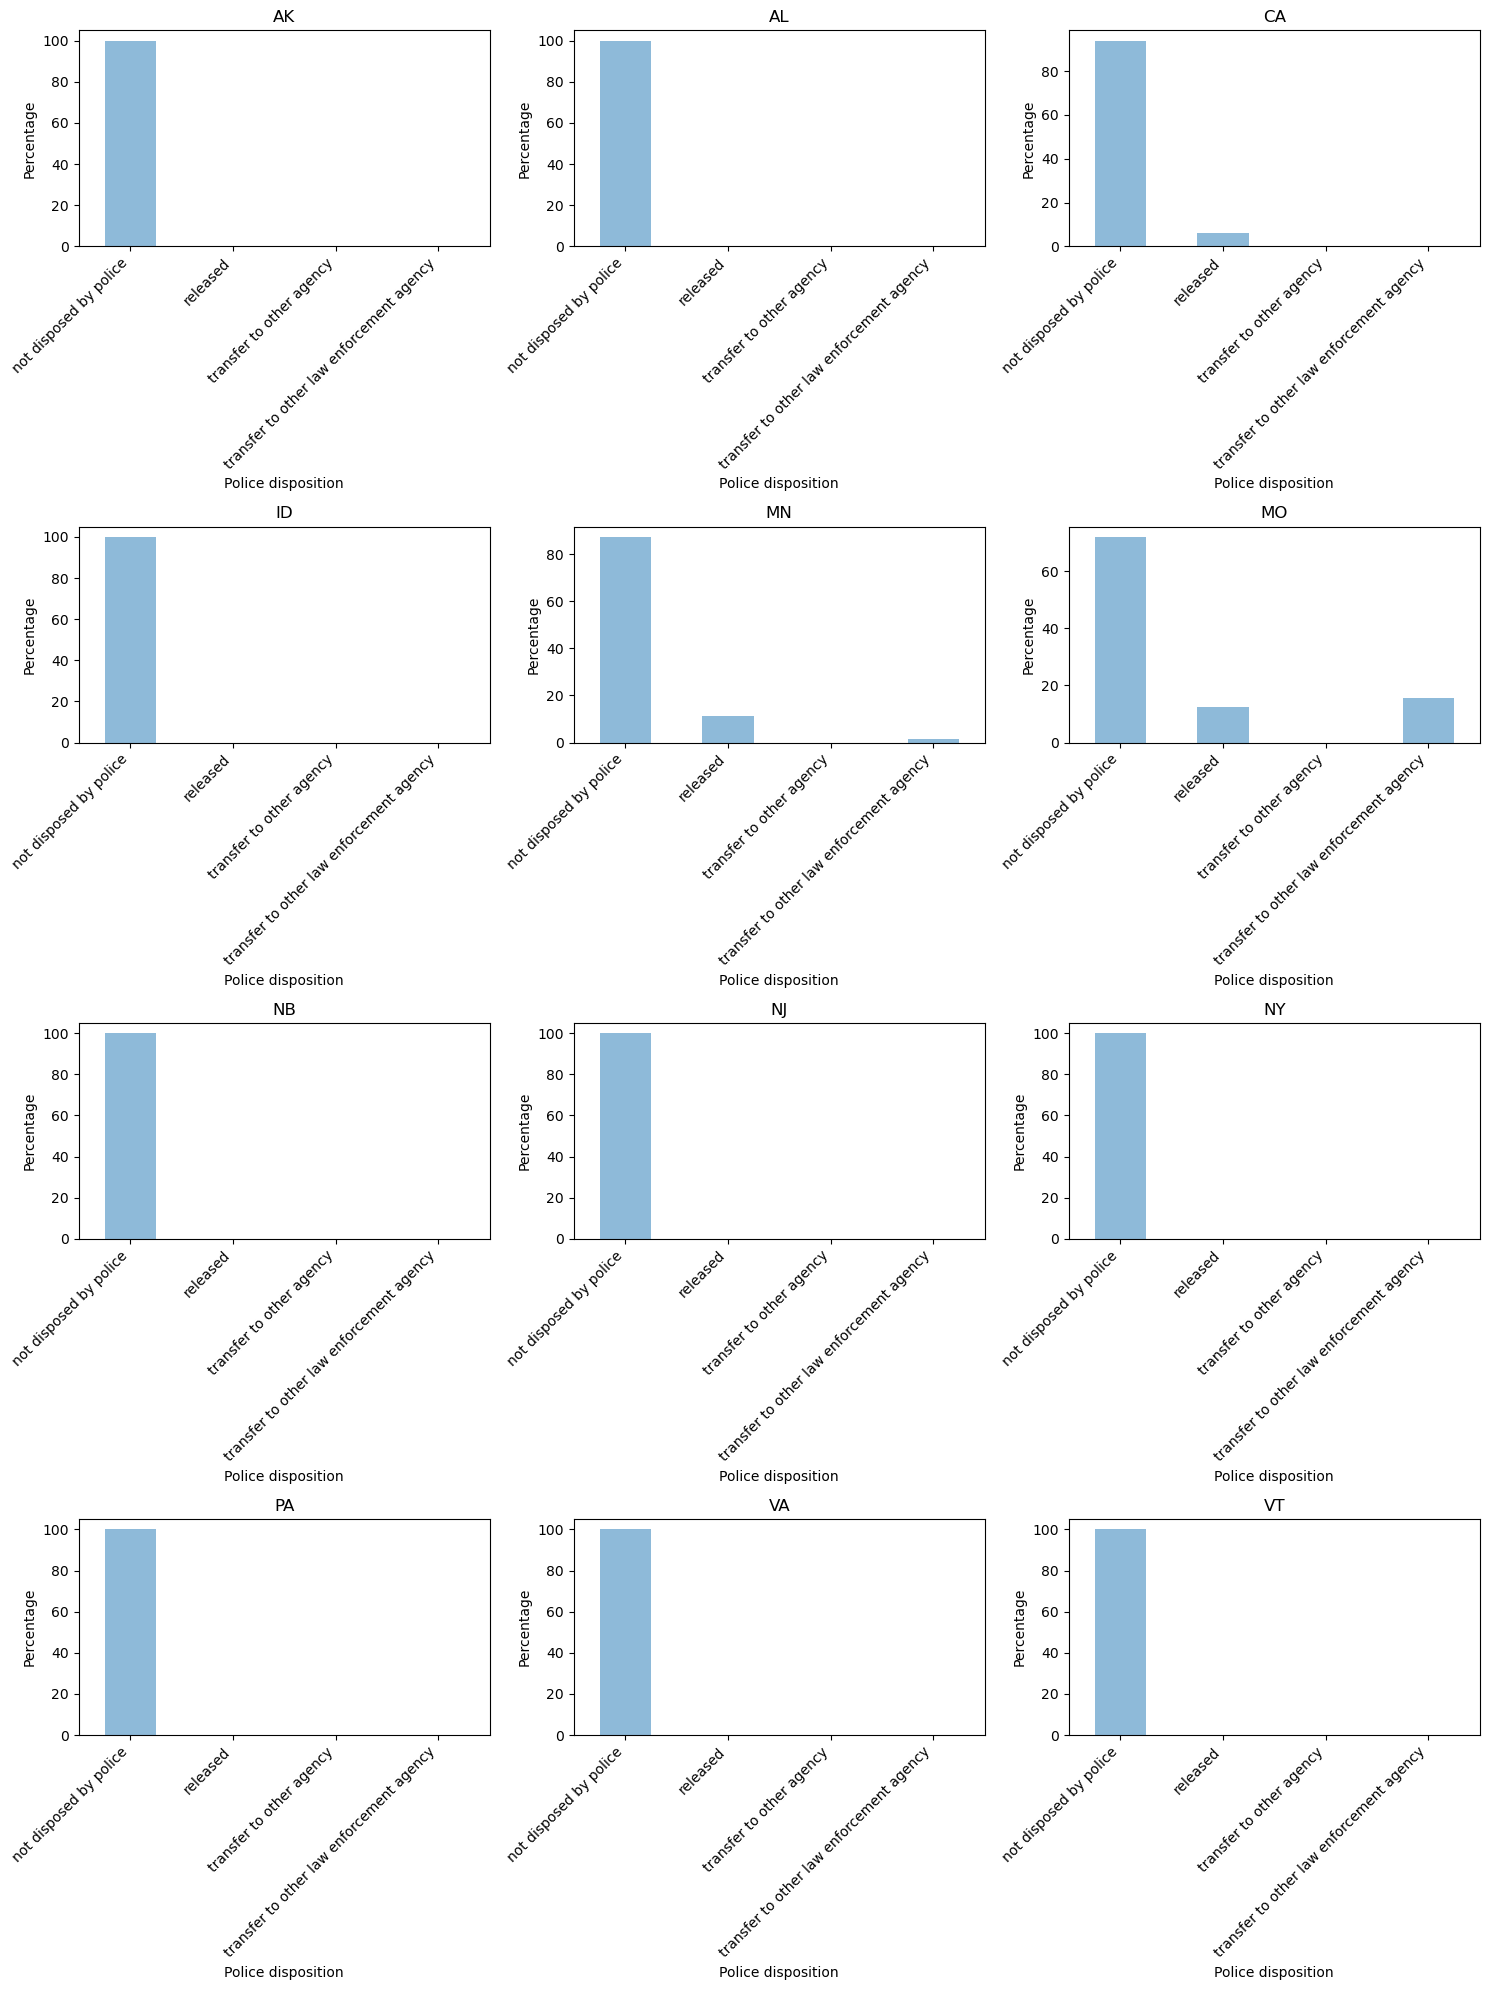

In [178]:
data_copy['police_disposition'] = pd.Categorical(data_copy['police_disposition'])

states = data_copy['state'].unique()

num_cols = 3
num_rows = len(states) // num_cols + (len(states) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, state in enumerate(states):
    row = i // num_cols
    col = i % num_cols
    
    state_data = data_copy[data_copy['state'] == state]
    count_by_value = state_data.groupby('police_disposition').size()
    percent_by_value = count_by_value / count_by_value.sum() * 100
    
    ax = axes[row, col] if num_rows > 1 else axes[col]
    percent_by_value.plot(kind='bar', alpha=0.5, ax=ax)
    
    ax.set_title(f"{state}")
    ax.set_xlabel('Police disposition')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(labels=percent_by_value.index, rotation=45, ha='right')
    
    plt.tight_layout()

plt.show()

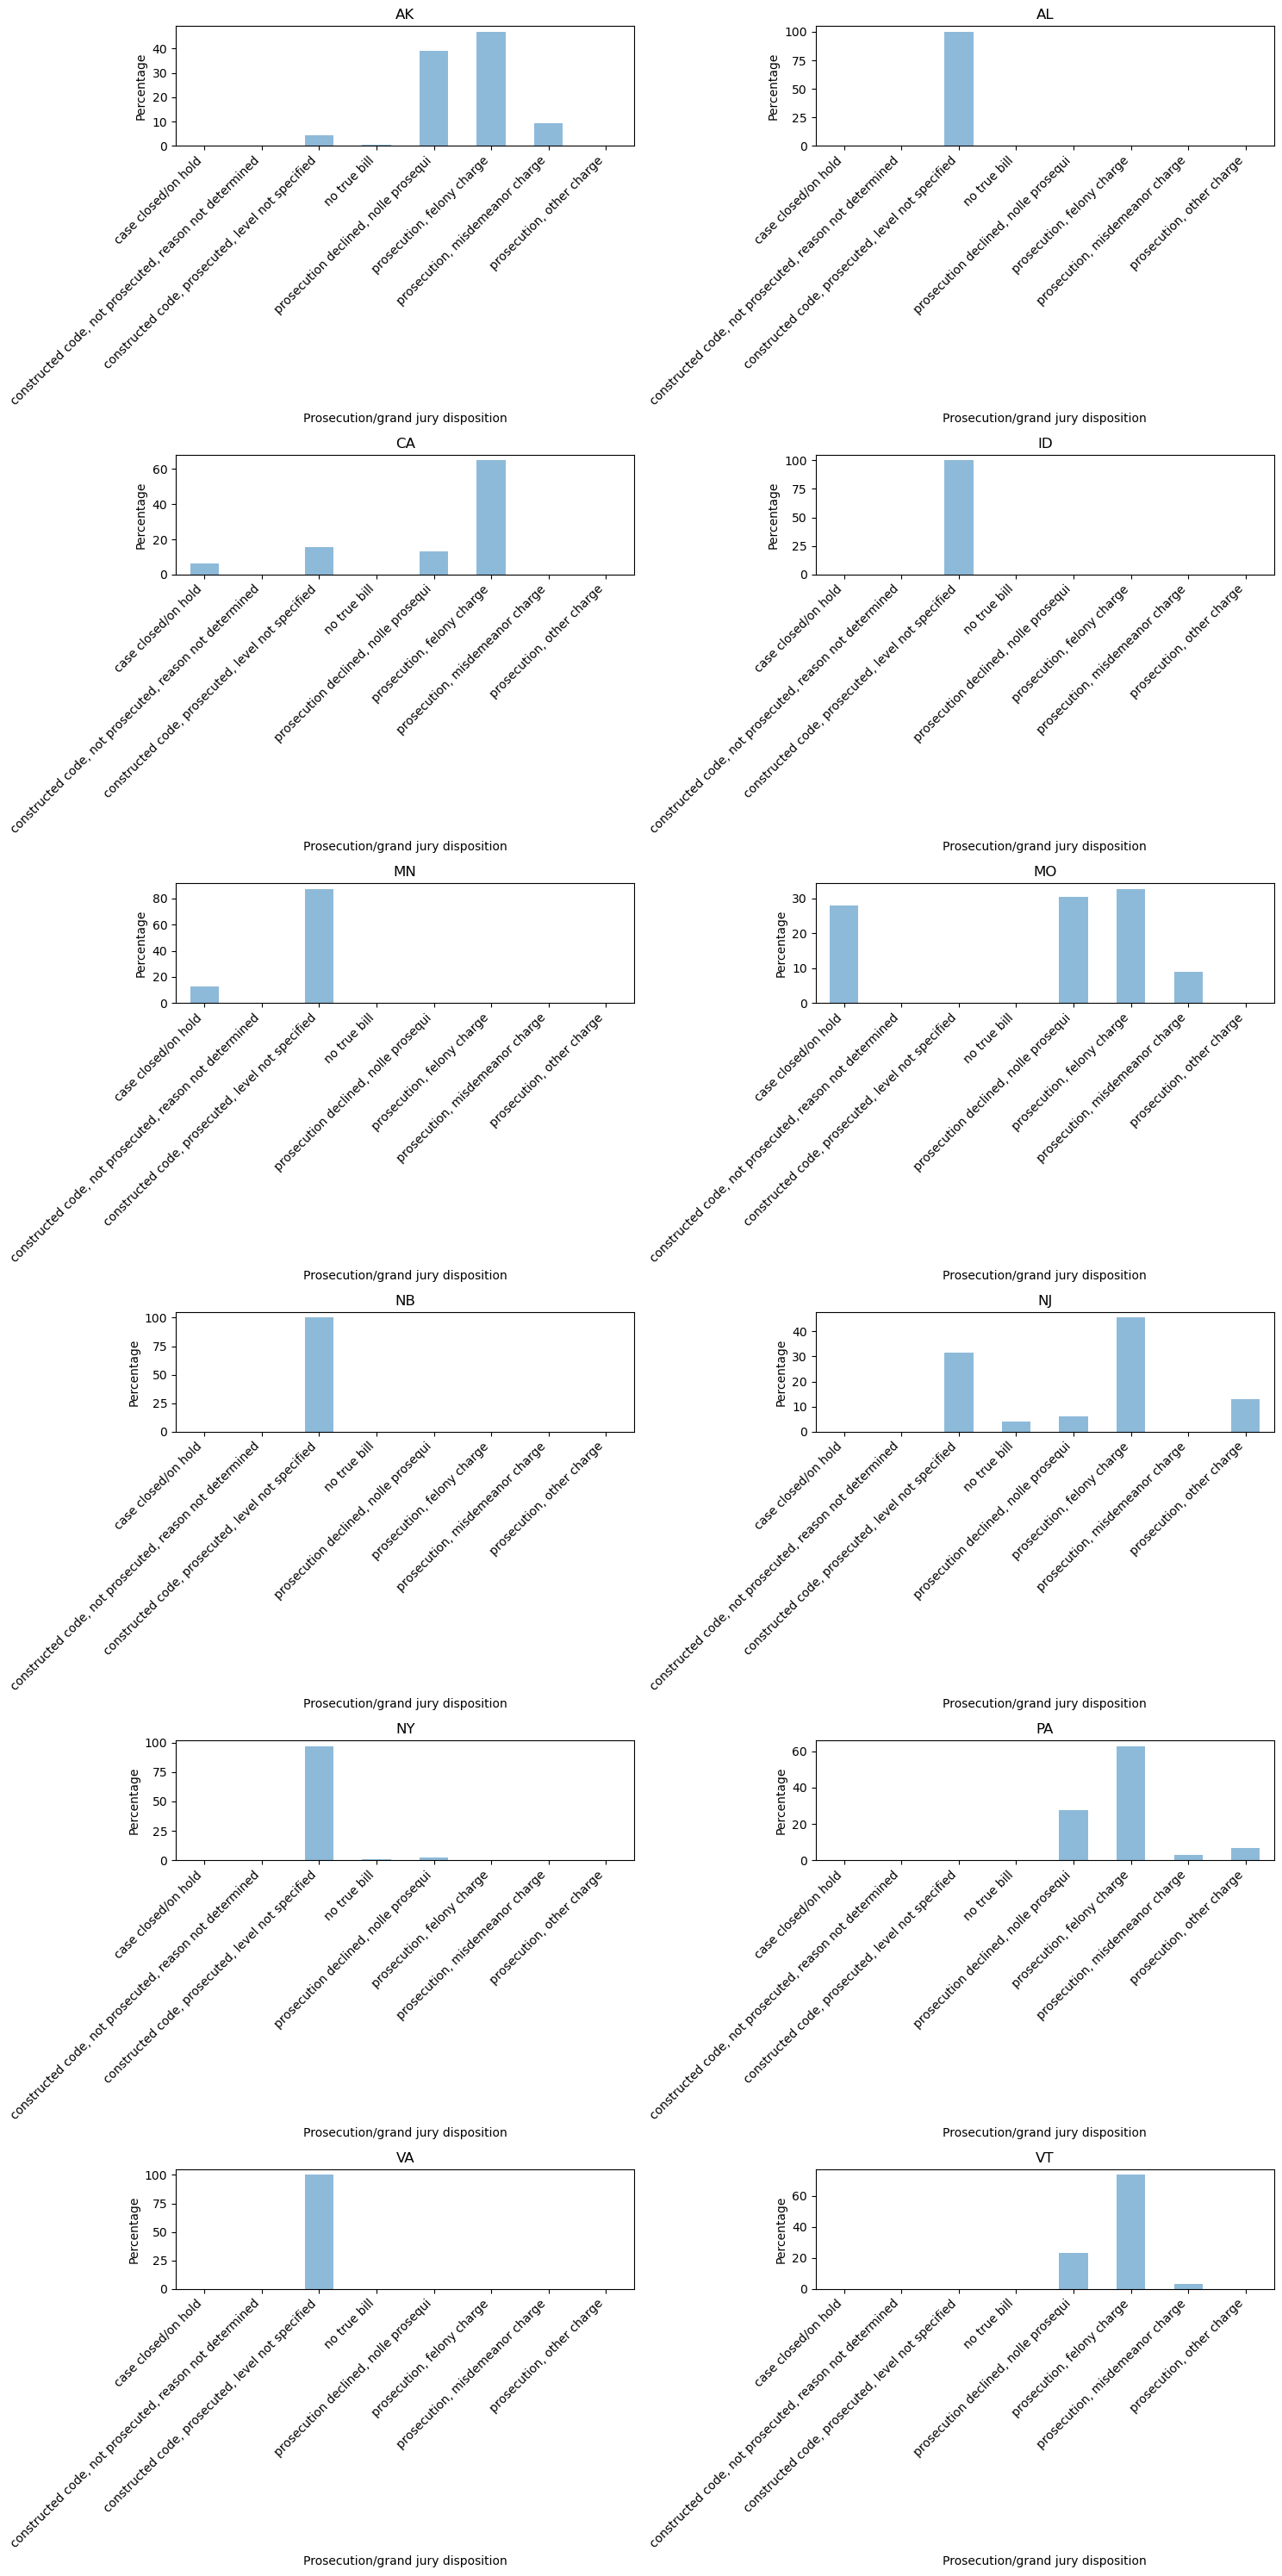

In [180]:
data_copy['prosec_grand_jury_disposition'] = pd.Categorical(data_copy['prosec_grand_jury_disposition'])

states = data_copy['state'].unique()

num_cols = 2
num_rows = len(states) // num_cols + (len(states) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, state in enumerate(states):
    row = i // num_cols
    col = i % num_cols
    
    state_data = data_copy[data_copy['state'] == state]
    count_by_value = state_data.groupby('prosec_grand_jury_disposition').size()
    percent_by_value = count_by_value / count_by_value.sum() * 100
    
    ax = axes[row, col] if num_rows > 1 else axes[col]
    percent_by_value.plot(kind='bar', alpha=0.5, ax=ax)
    
    ax.set_title(f"{state}")
    ax.set_xlabel('Prosecution/grand jury disposition')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(labels=percent_by_value.index, rotation=45, ha='right')
    
    plt.tight_layout()

plt.show()

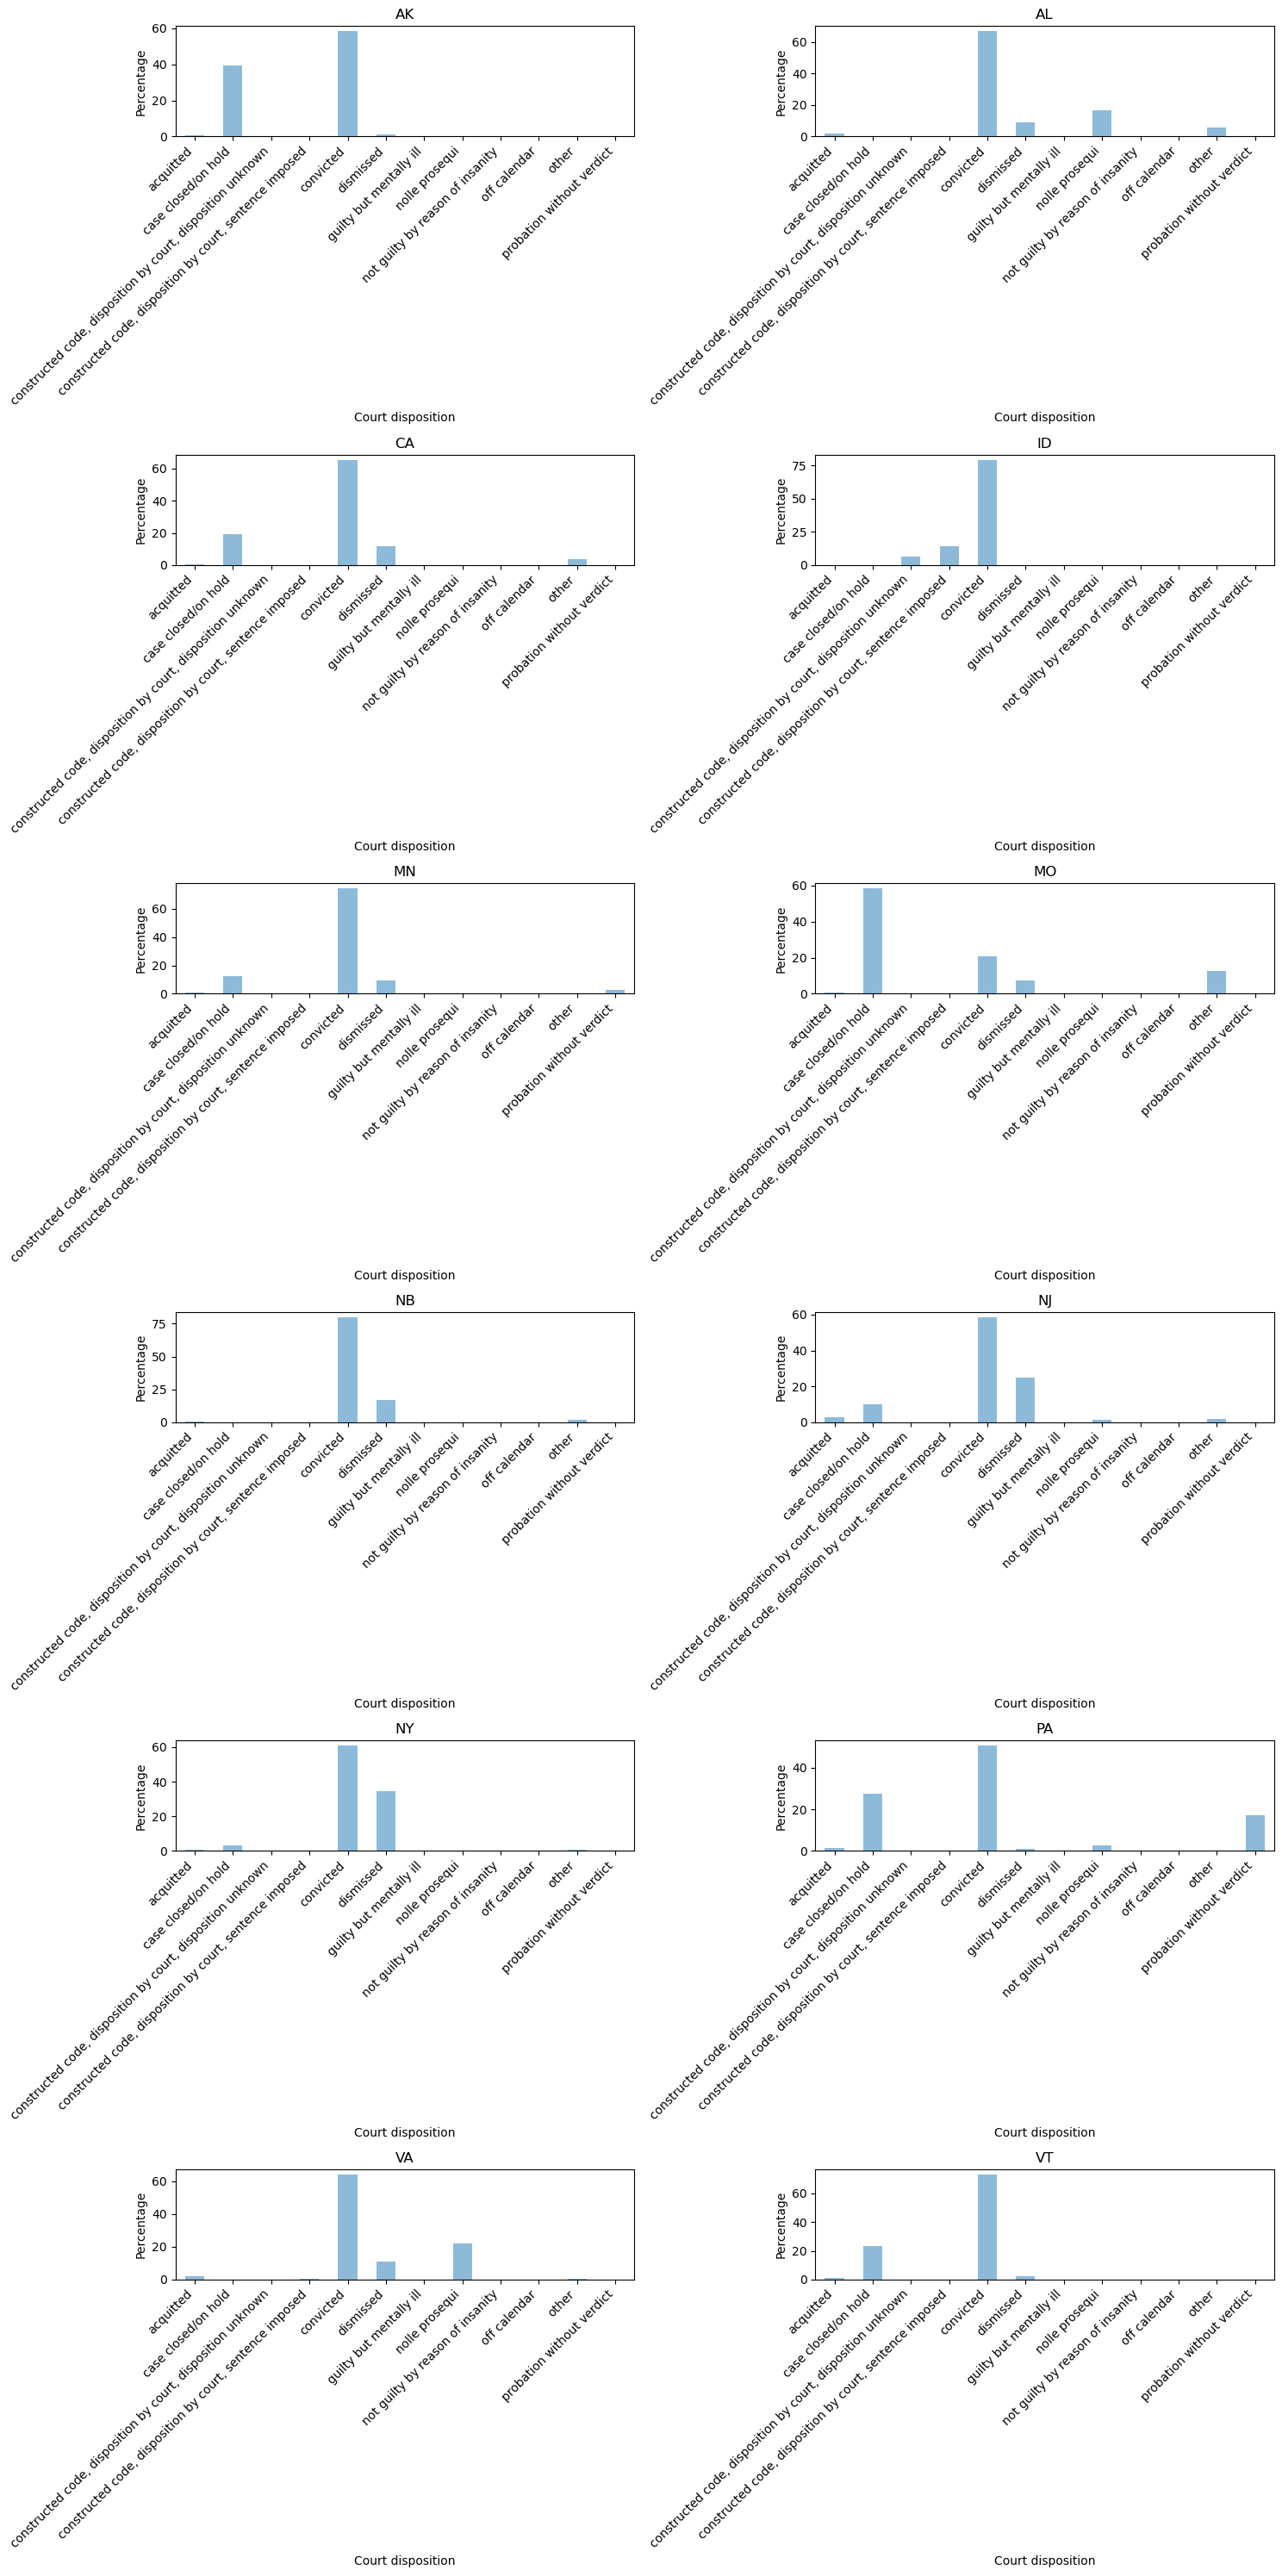

In [182]:
data_copy['court_disposition'] = pd.Categorical(data_copy['court_disposition'])

states = data_copy['state'].unique()

num_cols = 2 
num_rows = len(states) // num_cols + (len(states) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, state in enumerate(states):
    row = i // num_cols
    col = i % num_cols
    
    state_data = data_copy[data_copy['state'] == state]
    count_by_value = state_data.groupby('court_disposition').size()
    percent_by_value = count_by_value / count_by_value.sum() * 100
    
    ax = axes[row, col] if num_rows > 1 else axes[col]
    percent_by_value.plot(kind='bar', alpha=0.5, ax=ax)
    
    ax.set_title(f"{state}")
    ax.set_xlabel('Court disposition')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(labels=percent_by_value.index, rotation=45, ha='right')

    
    plt.tight_layout()

plt.show()


# test